In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg

%matplotlib inline

import numpy as np

darks=['#ff7200', '#984ea3', '#7fc97f', '#3a80b0', '#e261b0']
pastels=['#fed9a6','#decbe4','#ccebc5', '#b3cde3', '#f4cae4']

In [5]:
# import csv file containing calculated DNA concentrations

df=pd.read_csv('qPCR_samples.csv')
df

,sample,r1,r2,r3,mean,sd
0,-dnase,3733.139799,575.698337,4061.765872,2790.201336,1924.841922
1,DNA only,0.063393,0.003371,0.002076,0.022947,0.035034
2,+sen,0.383734,0.211180,0.798409,0.464441,0.301819
3,+sck6,0.022830,0.065832,0.021264,0.036642,0.025291
4,blank,0.001015,0.000350,0.000548,0.000637,0.000342


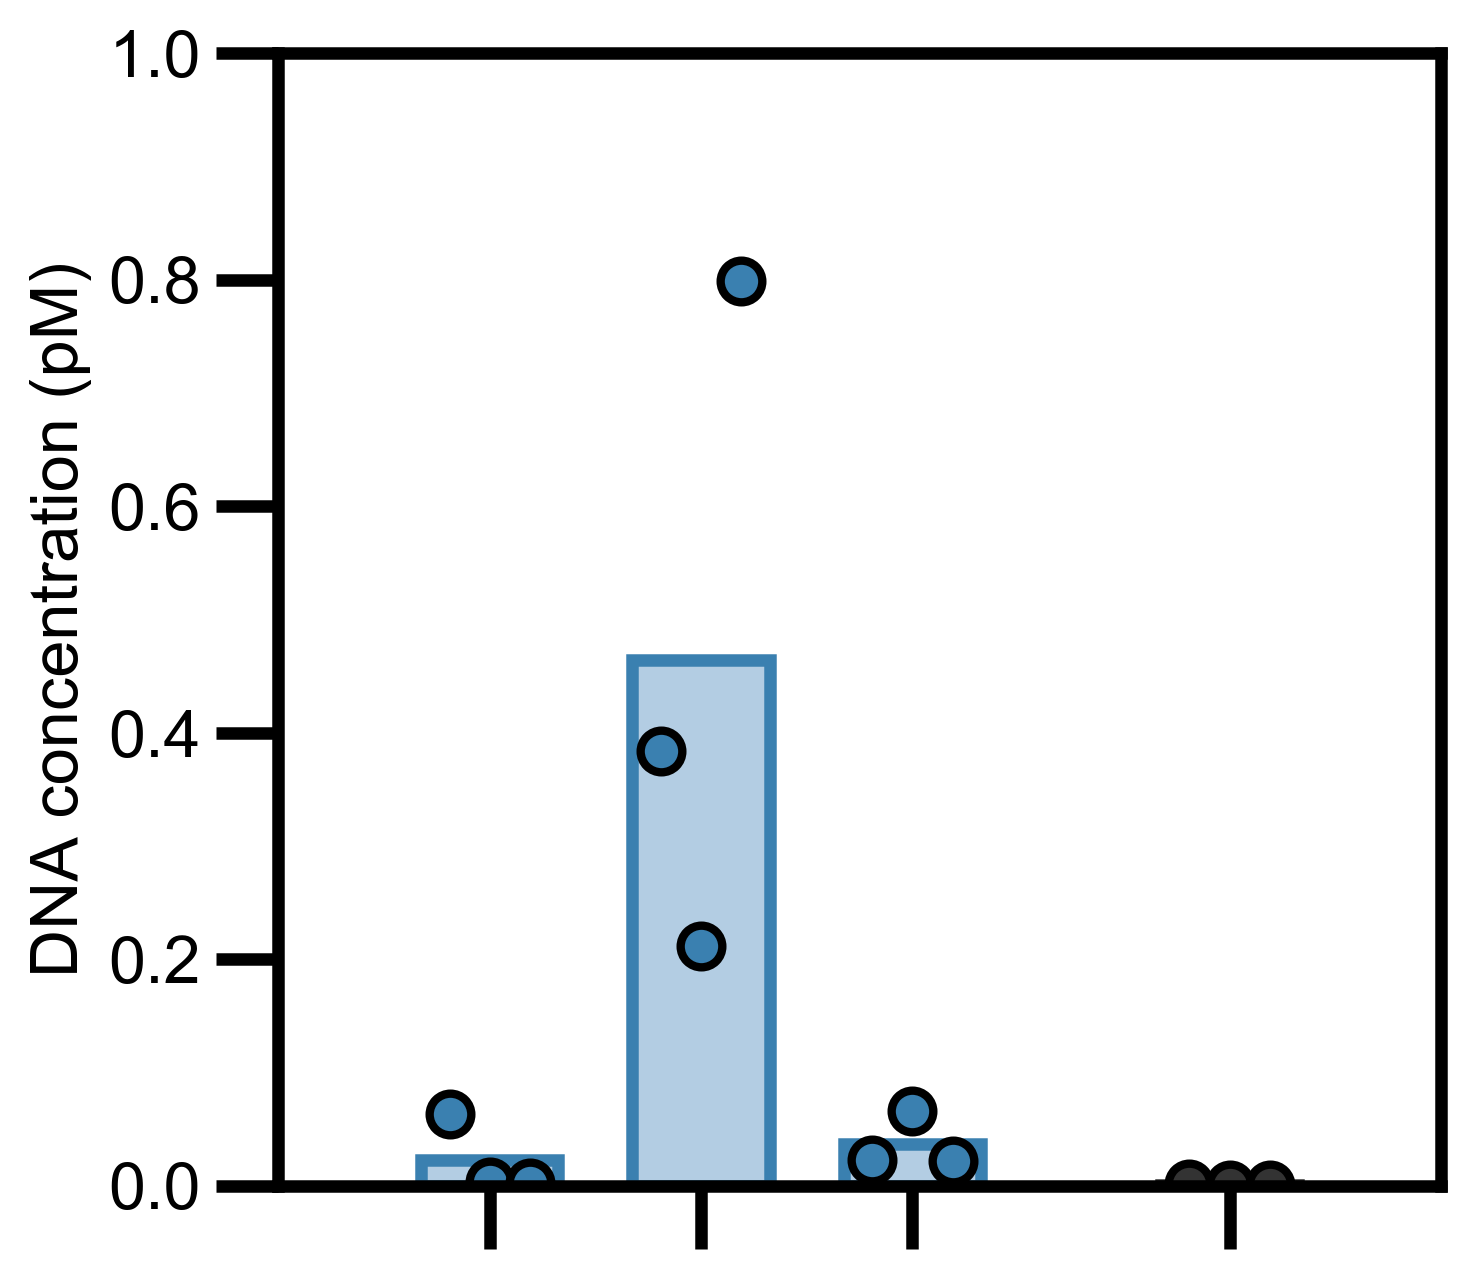

In [7]:
# to generate plot in fig 3k

fc=pastels[3]
ec=darks[3]
d=.19
ms=10
lw=3
mew=2
w=.65
mfc=ec
mc='black'
fs=16


fig, ax=plt.subplots(figsize=(5,5), dpi=300)
for i, name in zip(np.arange(3), [ 'DNA only', '+sen', '+sck6']):
    ax.bar(i, df.loc[df['sample']==name, 'mean'], facecolor=fc, edgecolor=ec, width=w, linewidth=lw)
    ax.plot(i-d, df.loc[df['sample']==name, 'r1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i, df.loc[df['sample']==name, 'r2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i+d, df.loc[df['sample']==name, 'r3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

i=3.5
name='blank'
ax.bar(i, df.loc[df['sample']==name, 'mean'], facecolor='#a9a9a9', edgecolor='#333333', width=w, linewidth=lw)
ax.plot(i-d, df.loc[df['sample']==name, 'r1'], 'o', mfc='#333333', mec='black', markersize=ms, mew=mew)
ax.plot(i, df.loc[df['sample']==name, 'r2'], 'o', mfc='#333333', mec='black', markersize=ms, mew=mew)
ax.plot(i+d, df.loc[df['sample']==name, 'r3'], 'o', mfc='#333333', mec='black', markersize=ms, mew=mew)


ax.set_xticks([0, 1, 2, 3.5])
ax.set_xticklabels([])
ax.set_xlim(-1, 4.5)
ax.set_ylim(0, 1)
ax.tick_params(which='major', direction='out', length=15, width=3)
ax.tick_params(which='minor', direction='out', length=0, width=3)
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.set_ylabel('DNA concentration (pM)', fontsize=fs, fontname='Arial')

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(lw)
    ax.spines[axis].set_color('black')

for tick in ax.get_xticklabels():
    tick.set_fontname('Arial')
    tick.set_fontsize(fs)
for tick in ax.get_yticklabels():
    tick.set_fontname('Arial')
    tick.set_fontsize(fs)

plt.show()
plt.tight_layout()
# fig.savefig('fig3k.pdf', bbox_inches='tight')
plt.close()




In [12]:
# to generate statistics listed in Supplementary Table 7

x=df.loc[df['sample']=='+sen']
sen=[float(x['r1']), float(x['r2']), float(x['r3'])]
x=df.loc[df['sample']=='+sck6']
sck=[float(x['r1']), float(x['r2']), float(x['r3'])]
x=df.loc[df['sample']=='DNA only']
dna=[float(x['r1']), float(x['r2']), float(x['r3'])]
x=df.loc[df['sample']=='blank']
h2o=[float(x['r1']), float(x['r2']), float(x['r3'])]

result=pg.ttest(sen, dna, tail='one-sided', correction=False)
print(result)

result = pg.ttest(sen,sck, tail='one-sided', correction=False)
print(result)

result=pg.ttest(dna, h2o,tail='one-sided', correction=False)
print(result)

result=pg.ttest(sck, dna,tail='one-sided', correction=False)
print(result)


            T  dof       tail     p-val         CI95%  cohen-d   BF10  power
T-test  2.517    4  one-sided  0.032793  [0.07, 0.82]    2.055  3.439  0.665
            T  dof       tail     p-val        CI95%  cohen-d   BF10  power
T-test  2.446    4  one-sided  0.035358  [0.06, 0.8]    1.998  3.302  0.644
            T  dof       tail     p-val          CI95%  cohen-d   BF10  power
T-test  1.103    4  one-sided  0.165978  [-0.02, 0.07]    0.901  1.541  0.235
            T  dof       tail     p-val          CI95%  cohen-d   BF10  power
T-test  0.549    4  one-sided  0.306115  [-0.04, 0.07]    0.448  1.227  0.119


In [14]:
# import file to generate standard curve shown in Supplementary Figure XXX
stds=pd.read_csv('qPCR_stds.csv')

m=-3.457
b=25.128

stds

,rep,log(DNA),Cq,DNA
0,r1,1.384991,20.003333,24.265625
1,r1,0.782931,22.170000,6.066406
2,r1,0.180871,24.386667,1.516602
3,r1,-0.421188,26.556667,0.379150
4,r1,-1.023248,28.690000,0.094788
5,r1,-1.625308,30.986667,0.023697
6,r1,-2.227368,32.653333,0.005924
7,r1,-2.829428,34.573333,0.001481
8,r2,1.371357,20.356667,23.515625
9,r2,0.769297,22.616667,5.878906


0.9465615991927694


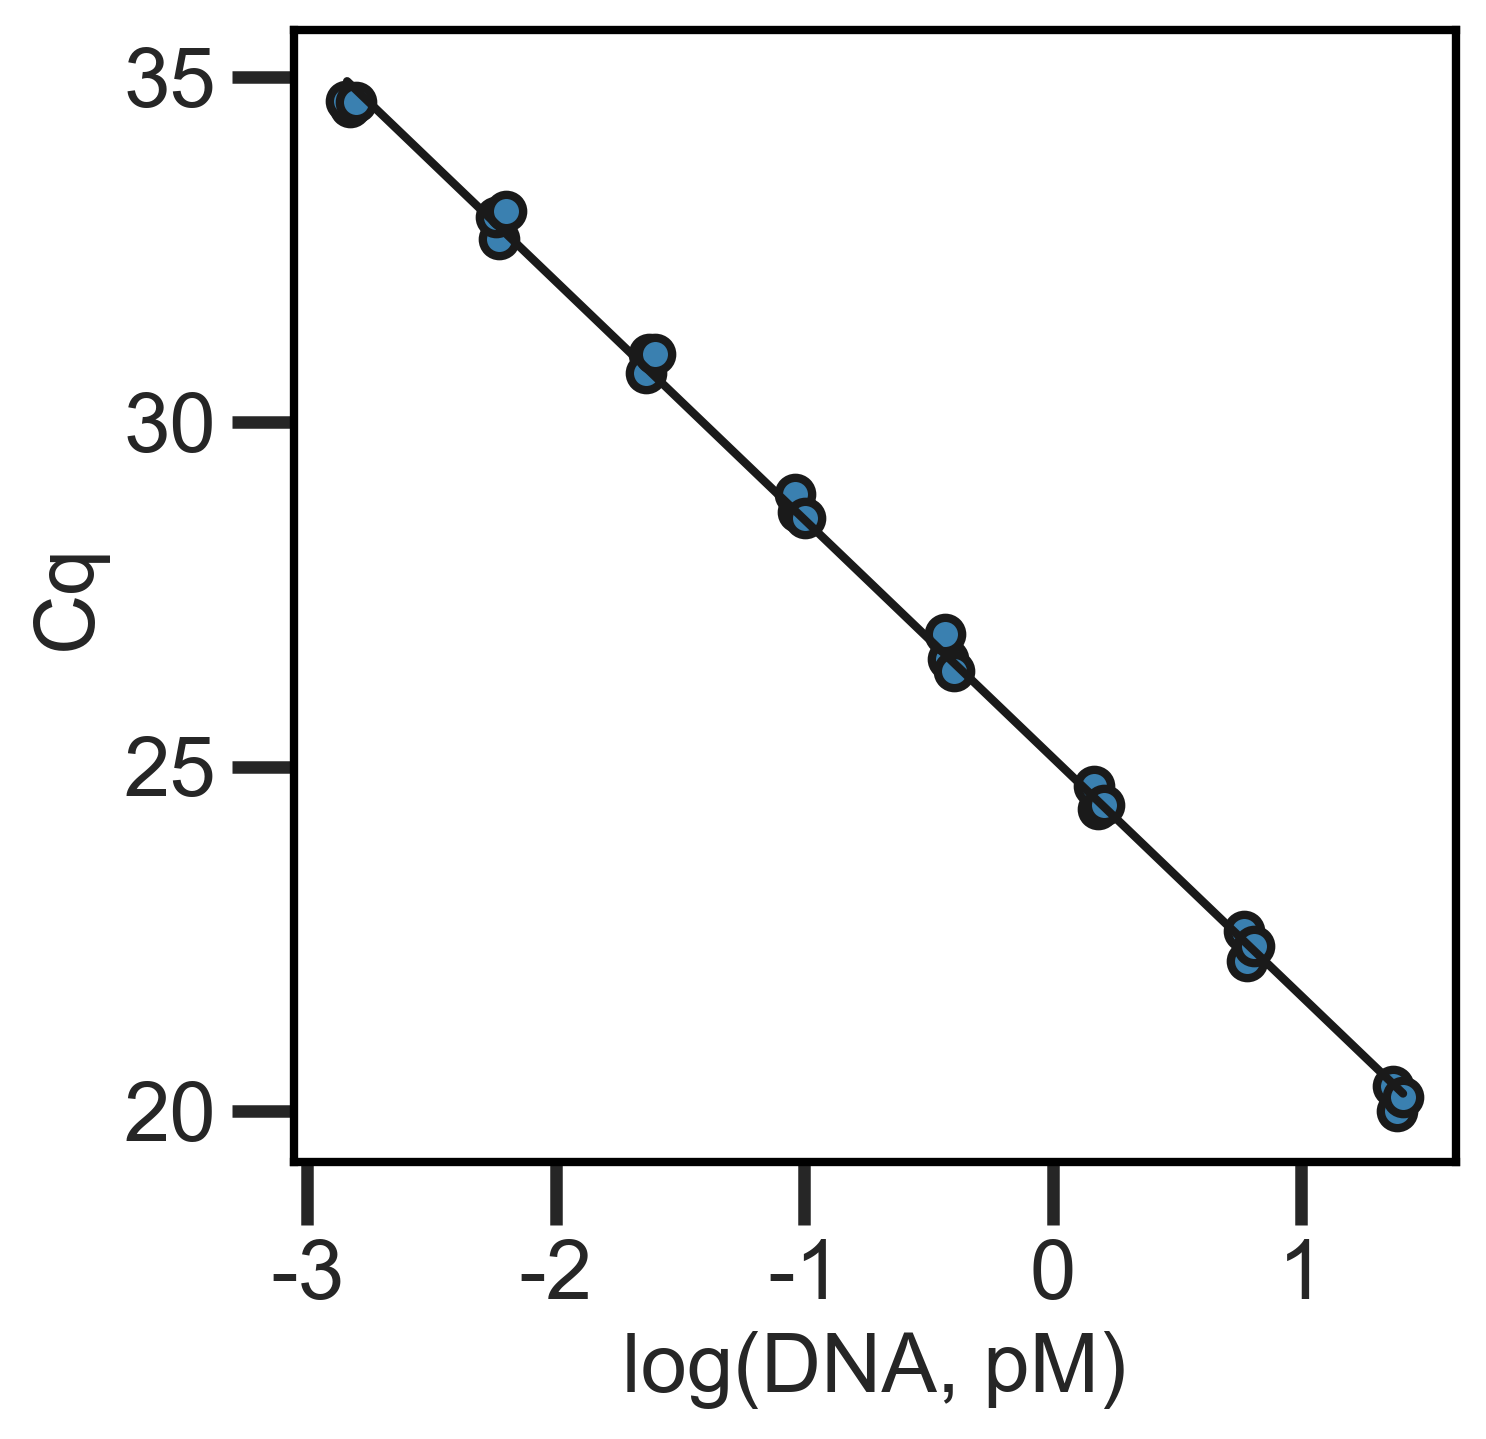

In [16]:
# code to generate standurd curve shown in supplemental

eff=10**(-1/m)-1
print(eff)

d=.19
ms=8
lw=2
mew=2
w=.65
mfc=ec
mc='black'
fs=20


fig, ax=plt.subplots(figsize=(5,5), dpi=300)
ax.plot(stds['log(DNA)'], stds['Cq'], 'o', mfc=ec, mec='k', ms=ms, mew=mew)

ax.plot([-2.84, 1.41], [-2.84*m+b, 1.41*m+b], '-', color='k', lw=lw)

ax.set_xticks([-3, -2, -1, 0, 1, ])
ax.set_xticklabels([-3, -2, -1, 0, 1, ], fontsize=fs, fontname='Arial')
ax.set_yticks([20, 25, 30, 35])
ax.set_yticklabels([20, 25, 30, 35], fontsize=fs, fontname='Arial')
ax.tick_params(which='major', direction='out', length=15, width=3)
ax.tick_params(which='minor', direction='out', length=0, width=3)
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.set_ylabel('Cq', fontsize=fs, fontname='Arial')
ax.set_xlabel('log(DNA, pM)', fontsize=fs, fontname='Arial')

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(lw)
    ax.spines[axis].set_color('black')


plt.show()
plt.tight_layout()
# fig.savefig('stds_curve.pdf', bbox_inches='tight')
plt.close()



In [ ]:
# raw Cq values for all three experiments are supplied as an excel sheet